In [135]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from gplearn.genetic import SymbolicRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error,r2_score, classification_report, max_error
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings ('ignore')


In [160]:
# Exploratory Data Analysis

In [41]:
def LabelEncode(df_local):
    for col in df_local.columns:
        col_dict = {}
        if df_local[col].dtype!='object':
            continue
        elif df_local[col].dtype=='object':
            col2=df_local[col].unique()
            z=0
            for i in col2:
                col_dict[i]=z
                z+=1
            df_local[col]=df_local[col].map(col_dict)
        
            
    return df_local

data=pd.read_csv("D:\\ds\\Folds5x2_pp.csv")
data.head()

print(data.columns)
data.fillna(0)
print(data.columns)
df_encode = LabelEncode(data)
df_encode.shape

X = [ 'AT', 'V', 'AP', 'RH' ]
Y = ['PE']
X_train, X_test, Y_train, Y_test = train_test_split(df_encode[X],df_encode[Y], test_size=0.25, random_state=42, shuffle=True)
df_train=pd.concat([X_train, Y_train], axis=1).reindex(X_train.index)
df_test=pd.concat([X_test, Y_test], axis=1).reindex(X_test.index)
print(df_train.size)
print(df_test.size)



Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')
Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')
35880
11960


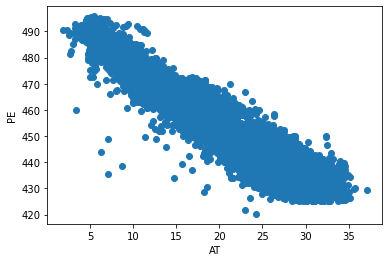

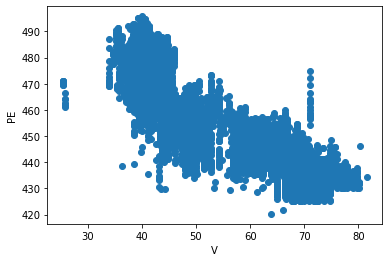

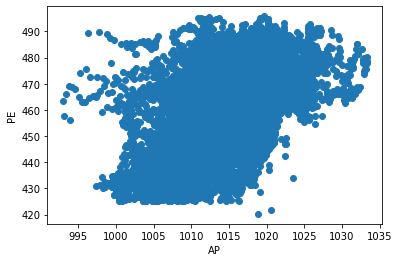

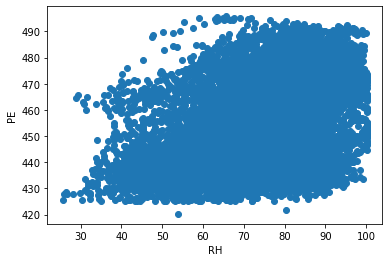

In [42]:
for i in X:
    plt.scatter(x=data[i], y=data[Y])
    plt.xlabel(i)
    plt.ylabel(Y[0])
    plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-02-15 14:37:00] Features: 1/4 -- score: 0.8983677421327251[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-02-15 14:37:00] Features: 2/4 -- score: 0.9202544966264534[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-02-15 14:37:00] Features: 3/4 -- score: 0.9277156422450121[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

    feature_idx                                          cv_scores avg_score  \
1          (0,)  [0.8980486525931834, 0.8951979217294994, 0.896...  0.898368   
2        (0, 3)  [0.9203998796814248, 0.9146071759763906, 0.919...  0.920254   
3     (0, 1, 3)  [0.929029970238515, 0.9210190210639747, 0.9283...  0.927716   
4  (0, 1, 2, 3)  [0.9291226535527468, 0.9213151876520369, 0.928...   0.92799   

     feature_names  ci_bound   std_dev   std_err  
1            (AT,)   0.00339  0.002637  0.001319  
2         (AT, RH)  0.004615  0.003591  0.001795  
3      (AT, V, RH)  0.004988  0.003881   0.00194  
4  (AT, V, AP, RH)  0.005055  0.003933  0.001966  


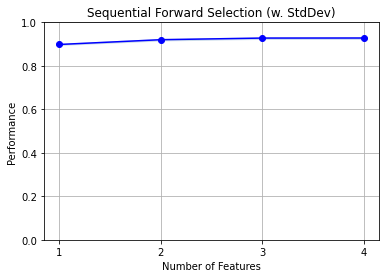

In [122]:
regr = LinearRegression()


#Forward Selection
sfs1 = SFS(regr, 
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=5)
sfs1.fit(df_train[X], df_train[Y])
print(pd.DataFrame.from_dict(sfs1.get_metric_dict()).T)
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [53]:
#BackWard Selection
sfs2 = SFS(regr, 
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='neg_mean_absolute_error',
           cv=5)
sfs2.fit(df_train[X], df_train[Y])

print(pd.DataFrame.from_dict(sfs2.get_metric_dict()).T)

    feature_idx                                          cv_scores avg_score  \
4  (0, 1, 2, 3)  [-3.6628155926646557, -3.712217297860965, -3.6... -3.642492   
3     (0, 1, 3)  [-3.6582503308275793, -3.717936484771711, -3.6... -3.641456   
2        (0, 3)  [-3.860460871947326, -3.8357535697409144, -3.8... -3.810738   
1          (0,)  [-4.322640514919366, -4.315486032875317, -4.31... -4.297919   

     feature_names  ci_bound   std_dev   std_err  
4  (AT, V, AP, RH)  0.090877  0.070706  0.035353  
3      (AT, V, RH)  0.088887  0.069157  0.034579  
2         (AT, RH)  0.067338  0.052392  0.026196  
1            (AT,)  0.054439  0.042355  0.021178  


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-02-15 13:40:30] Features: 3/1 -- score: -3.6414563730773493[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-02-15 13:40:30] Features: 2/1 -- score: -3.8107382125565605[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-02-15 13:40:30] Features: 1/1 -- score: -4.297918636246659

In [112]:
#StepWise Selection
sfs2 = SFS(regr, 
           k_features='best', 
           forward=True, 
           floating=True, 
           verbose=2,
           scoring='neg_mean_absolute_error',
           cv=5)
sfs2.fit(df_train[X], df_train[Y])

print(pd.DataFrame.from_dict(sfs2.get_metric_dict()).T)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-02-15 14:29:33] Features: 1/4 -- score: -4.297918636246659[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-02-15 14:29:33] Features: 2/4 -- score: -3.8107382125565605[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_job

    feature_idx                                          cv_scores avg_score  \
1          (0,)  [-4.322640514919366, -4.315486032875317, -4.31... -4.297919   
2        (0, 3)  [-3.860460871947326, -3.8357535697409144, -3.8... -3.810738   
3     (0, 1, 3)  [-3.6582503308275793, -3.717936484771711, -3.6... -3.641456   
4  (0, 1, 2, 3)  [-3.6628155926646557, -3.712217297860965, -3.6... -3.642492   

     feature_names  ci_bound   std_dev   std_err  
1            (AT,)  0.054439  0.042355  0.021178  
2         (AT, RH)  0.067338  0.052392  0.026196  
3      (AT, V, RH)  0.088887  0.069157  0.034579  
4  (AT, V, AP, RH)  0.090877  0.070706  0.035353  


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-02-15 14:29:33] Features: 4/4 -- score: -3.6424924591890586

In [134]:

 
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
 
poly.fit(X_poly, Y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, Y_train)
Y_Pred= lin2.predict(poly.fit_transform(X_test))
x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)
print(max_error(Y_test, Y_Pred))





R2 0.9388469766372023
Adj R2 0.9387444998489949
33.37268761955659


In [129]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model_l_cv = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_l_cv.fit(X_train, Y_train)
print(model_l_cv.alpha_)
lasso_best = Lasso(alpha=model_l_cv.alpha_)
lasso_best.fit(X_train, Y_train)
Y_Pred=lasso_best.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)



0.18892552527747175
R2 0.9303156097596659
Adj R2 0.9301988365879184


In [106]:
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)
Y_Pred=lasso_model.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)


R2 0.9300582893533962
Adj R2 0.9299410849786218


In [107]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=10, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, Y_train)
score_gp = est_gp.score(X_train, Y_train)
print(score_gp)
Y_Pred=est_gp.predict(X_test)
x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    31.03      3.98178e+28        3          17.3245          17.2795     45.90s
   1    16.24      2.78798e+12       17          6.42056          6.47186     32.76s
   2    19.61      2.02208e+12       17          6.40305          6.62933     31.70s
   3    11.81      8.09009e+14       25           6.0778          6.22479     23.03s
   4    10.42      6.55116e+11        9          5.46902          5.75868     18.61s
   5    16.01      7.55942e+07       17          4.98454          4.87764     16.83s
   6    17.92      3.67218e+07       17          4.95039          5.18482     13.38s
   7    15.51      1.93213e+08       21            4.882          4.86592      8.71s
   8    12.48      6.71757e+24       21          4.87054          4.96897  

0.1
R2 0.9303315032356659
Adj R2 0.9302147566973092
[0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.9281604

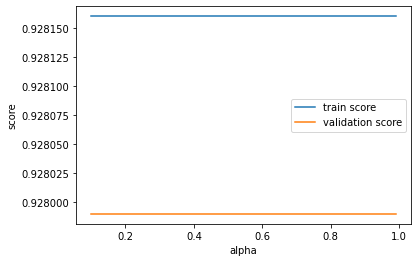

In [151]:


#define model
model_cv = RidgeCV(alphas=np.arange(.1, 1,0.01), cv=5, scoring='neg_mean_absolute_error')

#fit model
model_cv.fit(X_train, Y_train)

#display lambda that produced the lowest test MSE
print(model_cv.alpha_)

Y_Pred=model_cv.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)

train_scores, valid_scores = validation_curve(
 Ridge(), X_train, Y_train, param_name="alpha", param_range=np.arange(.1, 1,0.01),
 cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
print(train_scores_mean)
plt.xlabel('alpha')
plt.ylabel('score')
plt.plot(np.arange(.1, 1,0.01), train_scores_mean, label="train score")
plt.plot(np.arange(.1, 1,0.01), valid_scores_mean, label="validation score")
plt.legend()
plt.show()



R2 0.9303315100636426
Adj R2 0.9302147635367278
[[0.9283569  0.93090773 0.92801714 0.92882458 0.92740748]
 [0.9283569  0.93090773 0.92801714 0.92882458 0.92740748]]
[[0.92994189 0.91956988 0.93114221 0.92812498 0.93352748]
 [0.92994194 0.91956996 0.93114213 0.92812493 0.93352747]]


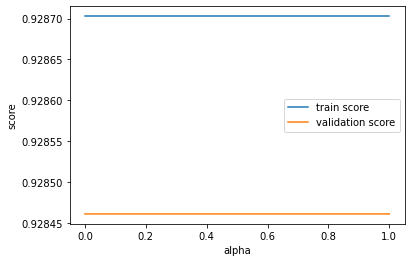

In [148]:

model = Ridge()
model.fit(X_train, Y_train)
Y_Pred=model.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)


In [110]:
regr = LinearRegression().fit(X_train, Y_train)

Y_Pred= regr.predict(X_test)


x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)

train_scores, valid_scores = validation_curve(
 LinearRegression(), X_train, Y_train, param_name="alpha", param_range=np.arange(.1, 1,0.01),
 cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
print(train_scores_mean)
plt.xlabel('alpha')
plt.ylabel('score')
plt.plot(np.arange(.1, 1,0.01), train_scores_mean, label="train score")
plt.plot(np.arange(.1, 1,0.01), valid_scores_mean, label="validation score")
plt.legend()
plt.show()



R2 0.9303315024744818
Adj R2 0.9302147559348496
